In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [3]:
df = pd.read_csv('/content/zbp21totals.csv')
df.head()

,zip,name,emp_nf,emp,qp1_nf,qp1,ap_nf,ap,est,city,stabbr,cty_name
0,501,"HOLTSVILLE, NY",J,41,J,198,J,898,10,HOLTSVILLE,NY,SUFFOLK
1,1001,"AGAWAM, MA",G,7616,G,103920,G,447397,475,AGAWAM,MA,HAMPDEN
2,1002,"AMHERST, MA",H,7450,H,70191,H,315640,502,AMHERST,MA,HAMPSHIRE
3,1003,"AMHERST, MA",G,214,H,2166,H,9307,15,AMHERST,MA,HAMPSHIRE
4,1004,"AMHERST, MA",J,117,J,1162,J,5618,6,AMHERST,MA,HAMPSHIRE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35038 entries, 0 to 35037
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   zip       35038 non-null  int64 
 1   name      35038 non-null  object
 2   emp_nf    35038 non-null  object
 3   emp       35038 non-null  int64 
 4   qp1_nf    35038 non-null  object
 5   qp1       35038 non-null  int64 
 6   ap_nf     35038 non-null  object
 7   ap        35038 non-null  int64 
 8   est       35038 non-null  int64 
 9   city      35037 non-null  object
 10  stabbr    35038 non-null  object
 11  cty_name  35037 non-null  object
dtypes: int64(5), object(7)
memory usage: 3.2+ MB


In [5]:
ny_df = df[df['stabbr'] == 'NY']
ny_df.head()

,zip,name,emp_nf,emp,qp1_nf,qp1,ap_nf,ap,est,city,stabbr,cty_name
0,501,"HOLTSVILLE, NY",J,41,J,198,J,898,10,HOLTSVILLE,NY,SUFFOLK
1872,6390,"FISHERS ISLAND, NY",G,230,G,3115,G,17701,42,FISHERS ISLAND,NY,SUFFOLK
2722,10001,"NEW YORK, NY",G,141331,G,4401881,G,16437815,6626,NEW YORK,NY,NEW YORK
2723,10002,"NEW YORK, NY",G,19971,G,173596,G,902676,2667,NEW YORK,NY,NEW YORK
2724,10003,"NEW YORK, NY",G,82374,G,1908102,G,7643447,4093,NEW YORK,NY,NEW YORK


In [22]:
nyc_filtered_df = ny_df[ny_df['cty_name'].isin(['NEW YORK','RICHMOND','BRONX','QUEENS','KINGS'])]
nyc_filtered_df.head()

,zip,name,emp_nf,emp,qp1_nf,qp1,ap_nf,ap,est,city,stabbr,cty_name
2722,10001,"NEW YORK, NY",G,141331,G,4401881,G,16437815,6626,NEW YORK,NY,NEW YORK
2723,10002,"NEW YORK, NY",G,19971,G,173596,G,902676,2667,NEW YORK,NY,NEW YORK
2724,10003,"NEW YORK, NY",G,82374,G,1908102,G,7643447,4093,NEW YORK,NY,NEW YORK
2725,10004,"NEW YORK, NY",G,49746,H,1807351,G,5798290,1488,NEW YORK,NY,NEW YORK
2726,10005,"NEW YORK, NY",G,34751,G,2013376,G,5769310,1300,NEW YORK,NY,NEW YORK


In [23]:
nyc_filtered_df.to_csv('/content/zbp_nyc.csv', index=False)

In [24]:
yelp_df = pd.read_csv('/content/yelp_chainness.csv')

In [25]:
yelp_df['chain_id_fuzzy'].value_counts()

4843.0     85
4256.0     64
270.0      61
6905.0     23
18125.0    22
           ..
6543.0      1
6544.0      1
6546.0      1
6547.0      1
18836.0     1
Name: chain_id_fuzzy, Length: 18835, dtype: int64

In [26]:
yelp_df['chain_count'] = yelp_df['chain_id_fuzzy'].map(yelp_df['chain_id_fuzzy'].value_counts())
yelp_df.head()

,Unnamed: 0,id,alias,name,image_url,is_closed,url,review_count,categories,rating,...,zip_codes,address,review_texts,review_ratings,review_times,chain_id_cosine,chain_id_jaccard,chain_id_levenshtein,chain_id_fuzzy,chain_count
0,5744,pNbrxyrG5d5QwRsKbu0cXg,46-new-york,46,https://s3-media3.fl.yelpcdn.com/bphoto/PDgpYA...,False,https://www.yelp.com/biz/46-new-york?adjust_cr...,97,"[{'alias': 'desserts', 'title': 'Desserts'}]",4.5,...,10013,46 Mott St,"[""Cash only for transactions under $5. \n\nAma...","[5, 3, 4]","[""2023-05-14 12:05:28"", ""2023-08-23 20:49:11"",...",NaN,NaN,NaN,NaN,NaN
1,13902,8Oo2AtQEPDfxIOnA8wfXoQ,886-new-york,886,https://s3-media3.fl.yelpcdn.com/bphoto/N-V-Dl...,False,https://www.yelp.com/biz/886-new-york?adjust_c...,693,"[{'alias': 'taiwanese', 'title': 'Taiwanese'},...",4.0,...,10003,26 Saint Marks Pl,"[""Love that this place kind of mimic the Asian...","[5, 4, 1]","[""2023-10-15 19:30:27"", ""2023-11-11 17:09:46"",...",1.0,1.0,1.0,1.0,1.0
2,95,fNKYBpQJivICm0ORb3nb_Q,8282-new-york-2,8282,https://s3-media2.fl.yelpcdn.com/bphoto/jMQtrS...,False,https://www.yelp.com/biz/8282-new-york-2?adjus...,178,"[{'alias': 'korean', 'title': 'Korean'}]",4.5,...,10002,84 Stanton St,"[""This is a small Korean fusion tapas restaura...","[5, 5, 5]","[""2023-11-08 19:11:14"", ""2023-10-26 22:42:57"",...",2.0,2.0,2.0,2.0,1.0
3,22197,Xu1jidsfdN0Wb3RMII3abw,apr57-new-york-2,Apr-57,https://s3-media1.fl.yelpcdn.com/bphoto/osmh-5...,False,https://www.yelp.com/biz/apr57-new-york-2?adju...,28,"[{'alias': 'jewelry', 'title': 'Jewelry'}, {'a...",2.5,...,10019,200 W 57th St,NaN,NaN,NaN,3.0,3.0,3.0,3.0,1.0
4,11459,cuqT0Venx12D4bil06J1UA,purnima-halal-brooklyn,Purnima Halal,NaN,False,https://www.yelp.com/biz/purnima-halal-brookly...,1,"[{'alias': 'grocery', 'title': 'Grocery'}]",5.0,...,11216,1257 Fulton St,"[""Wide selection, all clean and new. Welcoming...",[5],"[""2018-03-20 02:10:06""]",4.0,4.0,4.0,4.0,1.0


In [35]:
yelp_df.to_csv('/content/yelp_chain_count.csv', index=False)

In [39]:
top_chains_raw = pd.read_csv('/content/topchains.csv')

In [40]:
top_chains_raw

,Category,Rank,Chain
0,Restaurants,1,McDonald's
1,Restaurants,2,Starbucks
2,Restaurants,3,Subway
3,Restaurants,4,Pizza Hut
4,Restaurants,5,Domino's Pizza
...,...,...,...
244,Health,21,Northwell Health
245,Health,22,University of Pittsburgh Medical Center
246,Health,23,Cedars-Sinai Medical Center
247,Health,24,Stanford Health Care


In [41]:
top_chains_df = top_chains_raw[~top_chains_raw['Chain'].duplicated()]
top_chains_df

,Category,Rank,Chain
0,Restaurants,1,McDonald's
1,Restaurants,2,Starbucks
2,Restaurants,3,Subway
3,Restaurants,4,Pizza Hut
4,Restaurants,5,Domino's Pizza
...,...,...,...
244,Health,21,Northwell Health
245,Health,22,University of Pittsburgh Medical Center
246,Health,23,Cedars-Sinai Medical Center
247,Health,24,Stanford Health Care


In [42]:
!pip install fuzzywuzzy

In [44]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

def find_similar_chain(name):
    matches = process.extract(name, top_chains_df['Chain'], scorer=fuzz.token_sort_ratio)
    best_match = max(matches, key=lambda x: x[1])
    if best_match[1] >= 80:
        return best_match[0]
    else:
        return None

yelp_df['chain_type'] = yelp_df['name'].apply(lambda x: 2 if find_similar_chain(x) else 0)
yelp_df

,Unnamed: 0,id,alias,name,image_url,is_closed,url,review_count,categories,rating,...,address,review_texts,review_ratings,review_times,chain_id_cosine,chain_id_jaccard,chain_id_levenshtein,chain_id_fuzzy,chain_count,chain_type
0,5744,pNbrxyrG5d5QwRsKbu0cXg,46-new-york,46,https://s3-media3.fl.yelpcdn.com/bphoto/PDgpYA...,False,https://www.yelp.com/biz/46-new-york?adjust_cr...,97,"[{'alias': 'desserts', 'title': 'Desserts'}]",4.5,...,46 Mott St,"[""Cash only for transactions under $5. \n\nAma...","[5, 3, 4]","[""2023-05-14 12:05:28"", ""2023-08-23 20:49:11"",...",NaN,NaN,NaN,NaN,NaN,0
1,13902,8Oo2AtQEPDfxIOnA8wfXoQ,886-new-york,886,https://s3-media3.fl.yelpcdn.com/bphoto/N-V-Dl...,False,https://www.yelp.com/biz/886-new-york?adjust_c...,693,"[{'alias': 'taiwanese', 'title': 'Taiwanese'},...",4.0,...,26 Saint Marks Pl,"[""Love that this place kind of mimic the Asian...","[5, 4, 1]","[""2023-10-15 19:30:27"", ""2023-11-11 17:09:46"",...",1.0,1.0,1.0,1.0,1.0,0
2,95,fNKYBpQJivICm0ORb3nb_Q,8282-new-york-2,8282,https://s3-media2.fl.yelpcdn.com/bphoto/jMQtrS...,False,https://www.yelp.com/biz/8282-new-york-2?adjus...,178,"[{'alias': 'korean', 'title': 'Korean'}]",4.5,...,84 Stanton St,"[""This is a small Korean fusion tapas restaura...","[5, 5, 5]","[""2023-11-08 19:11:14"", ""2023-10-26 22:42:57"",...",2.0,2.0,2.0,2.0,1.0,0
3,22197,Xu1jidsfdN0Wb3RMII3abw,apr57-new-york-2,Apr-57,https://s3-media1.fl.yelpcdn.com/bphoto/osmh-5...,False,https://www.yelp.com/biz/apr57-new-york-2?adju...,28,"[{'alias': 'jewelry', 'title': 'Jewelry'}, {'a...",2.5,...,200 W 57th St,NaN,NaN,NaN,3.0,3.0,3.0,3.0,1.0,0
4,11459,cuqT0Venx12D4bil06J1UA,purnima-halal-brooklyn,Purnima Halal,NaN,False,https://www.yelp.com/biz/purnima-halal-brookly...,1,"[{'alias': 'grocery', 'title': 'Grocery'}]",5.0,...,1257 Fulton St,"[""Wide selection, all clean and new. Welcoming...",[5],"[""2018-03-20 02:10:06""]",4.0,4.0,4.0,4.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21664,712,abNHO9-xlCsv31gghCUuxw,zutto-japanese-american-pub-new-york-2,Zutto Japanese American Pub,https://s3-media3.fl.yelpcdn.com/bphoto/kNweT2...,False,https://www.yelp.com/biz/zutto-japanese-americ...,1027,"[{'alias': 'sushi', 'title': 'Sushi Bars'}, {'...",4.0,...,77 Hudson St,"[""I don't know why I stopped in... maybe cuz I...","[4, 4, 5]","[""2023-09-25 12:36:19"", ""2023-09-23 10:06:16"",...",19682.0,18513.0,19342.0,18831.0,1.0,0
21665,18003,6ebOnjQ7An6J94Sv7qkfRQ,zuzus-petals-brooklyn,Zuzu's Petals,https://s3-media1.fl.yelpcdn.com/bphoto/02bT9I...,False,https://www.yelp.com/biz/zuzus-petals-brooklyn...,92,"[{'alias': 'florists', 'title': 'Florists'}, {...",4.0,...,374 5th Ave,NaN,NaN,NaN,19683.0,18514.0,19343.0,18832.0,1.0,0
21666,11100,3FzpZE56CHuipiY_JDT3EA,zyara-restaurant-astoria-2,Zyara Restaurant,https://s3-media3.fl.yelpcdn.com/bphoto/ZxC5z2...,False,https://www.yelp.com/biz/zyara-restaurant-asto...,325,"[{'alias': 'halal', 'title': 'Halal'}, {'alias...",3.5,...,25-53 Steinway St,"[""I came here for a family dinner - the decor ...","[4, 1, 3]","[""2023-06-24 12:31:40"", ""2023-07-17 06:11:04"",...",19684.0,18515.0,19344.0,18833.0,1.0,0
21667,24086,3ZRU-srtIKQ5uf9S3EYKig,zyoga-space-new-york,Zyoga Space,https://s3-media2.fl.yelpcdn.com/bphoto/mxB1FT...,False,https://www.yelp.com/biz/zyoga-space-new-york?...,1,"[{'alias': 'yoga', 'title': 'Yoga'}]",5.0,...,162 West 72nd St,NaN,NaN,NaN,19685.0,18516.0,19345.0,18834.0,1.0,0


In [53]:
temp_df = yelp_df[yelp_df['chain_type']== 2]
temp_df['name'].unique()

array(['7-Eleven', 'About Coffee', 'Alberto & Sons', 'ALDI', 'AlMar',
       'Aman', 'Amazon Go', 'Anytime Fitness', 'Au Bon Pain',
       'Barnes & Noble', 'Barnes & Noble Cafe', 'Barnes And Noble',
       'Barnes and Noble', "BJ's Restaurant & Brewhouse", 'BK Pilates',
       'Blink Fitness - 116th', 'Blink Fitness - 125th',
       'Blink Fitness - FiDi', 'Blink Fitness - Gates',
       'Blink Fitness - Noho', 'Blue Bottle Coffee', 'BNL Fitness',
       'Bookshop', 'Buffalo Wild Wings', "Chicky's General Store",
       'CHILI', 'Club Pilates', 'CorePower Yoga', 'Costco',
       'CrossFit ECF', 'Crossfit NYC', 'Crunch Fitness - FiDi',
       'CYCLEBAR', 'CycleBar', "Denny's", "Dino's Pizzeria",
       'Dollar Tree', "Dunkin'", 'Eleven B', 'Equinox', 'F45 Training',
       'F45 Training Dumbo', 'Forever 21', 'Four Fitness', "Gino's Pizza",
       "Gold's Gym", 'Gregorys Coffee', 'H&M', 'Hard Rock Cafe', 'IHOP',
       'inSHAPE Fitness', 'Japan Express', 'JCPenney', "Jimmy John's",
    

In [55]:
yelp_df.loc[(yelp_df['chain_type'] != 2) & (yelp_df['chain_count'] >= 5), 'chain_type'] = 1
yelp_df

,Unnamed: 0,id,alias,name,image_url,is_closed,url,review_count,categories,rating,...,address,review_texts,review_ratings,review_times,chain_id_cosine,chain_id_jaccard,chain_id_levenshtein,chain_id_fuzzy,chain_count,chain_type
0,5744,pNbrxyrG5d5QwRsKbu0cXg,46-new-york,46,https://s3-media3.fl.yelpcdn.com/bphoto/PDgpYA...,False,https://www.yelp.com/biz/46-new-york?adjust_cr...,97,"[{'alias': 'desserts', 'title': 'Desserts'}]",4.5,...,46 Mott St,"[""Cash only for transactions under $5. \n\nAma...","[5, 3, 4]","[""2023-05-14 12:05:28"", ""2023-08-23 20:49:11"",...",NaN,NaN,NaN,NaN,NaN,0
1,13902,8Oo2AtQEPDfxIOnA8wfXoQ,886-new-york,886,https://s3-media3.fl.yelpcdn.com/bphoto/N-V-Dl...,False,https://www.yelp.com/biz/886-new-york?adjust_c...,693,"[{'alias': 'taiwanese', 'title': 'Taiwanese'},...",4.0,...,26 Saint Marks Pl,"[""Love that this place kind of mimic the Asian...","[5, 4, 1]","[""2023-10-15 19:30:27"", ""2023-11-11 17:09:46"",...",1.0,1.0,1.0,1.0,1.0,0
2,95,fNKYBpQJivICm0ORb3nb_Q,8282-new-york-2,8282,https://s3-media2.fl.yelpcdn.com/bphoto/jMQtrS...,False,https://www.yelp.com/biz/8282-new-york-2?adjus...,178,"[{'alias': 'korean', 'title': 'Korean'}]",4.5,...,84 Stanton St,"[""This is a small Korean fusion tapas restaura...","[5, 5, 5]","[""2023-11-08 19:11:14"", ""2023-10-26 22:42:57"",...",2.0,2.0,2.0,2.0,1.0,0
3,22197,Xu1jidsfdN0Wb3RMII3abw,apr57-new-york-2,Apr-57,https://s3-media1.fl.yelpcdn.com/bphoto/osmh-5...,False,https://www.yelp.com/biz/apr57-new-york-2?adju...,28,"[{'alias': 'jewelry', 'title': 'Jewelry'}, {'a...",2.5,...,200 W 57th St,NaN,NaN,NaN,3.0,3.0,3.0,3.0,1.0,0
4,11459,cuqT0Venx12D4bil06J1UA,purnima-halal-brooklyn,Purnima Halal,NaN,False,https://www.yelp.com/biz/purnima-halal-brookly...,1,"[{'alias': 'grocery', 'title': 'Grocery'}]",5.0,...,1257 Fulton St,"[""Wide selection, all clean and new. Welcoming...",[5],"[""2018-03-20 02:10:06""]",4.0,4.0,4.0,4.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21664,712,abNHO9-xlCsv31gghCUuxw,zutto-japanese-american-pub-new-york-2,Zutto Japanese American Pub,https://s3-media3.fl.yelpcdn.com/bphoto/kNweT2...,False,https://www.yelp.com/biz/zutto-japanese-americ...,1027,"[{'alias': 'sushi', 'title': 'Sushi Bars'}, {'...",4.0,...,77 Hudson St,"[""I don't know why I stopped in... maybe cuz I...","[4, 4, 5]","[""2023-09-25 12:36:19"", ""2023-09-23 10:06:16"",...",19682.0,18513.0,19342.0,18831.0,1.0,0
21665,18003,6ebOnjQ7An6J94Sv7qkfRQ,zuzus-petals-brooklyn,Zuzu's Petals,https://s3-media1.fl.yelpcdn.com/bphoto/02bT9I...,False,https://www.yelp.com/biz/zuzus-petals-brooklyn...,92,"[{'alias': 'florists', 'title': 'Florists'}, {...",4.0,...,374 5th Ave,NaN,NaN,NaN,19683.0,18514.0,19343.0,18832.0,1.0,0
21666,11100,3FzpZE56CHuipiY_JDT3EA,zyara-restaurant-astoria-2,Zyara Restaurant,https://s3-media3.fl.yelpcdn.com/bphoto/ZxC5z2...,False,https://www.yelp.com/biz/zyara-restaurant-asto...,325,"[{'alias': 'halal', 'title': 'Halal'}, {'alias...",3.5,...,25-53 Steinway St,"[""I came here for a family dinner - the decor ...","[4, 1, 3]","[""2023-06-24 12:31:40"", ""2023-07-17 06:11:04"",...",19684.0,18515.0,19344.0,18833.0,1.0,0
21667,24086,3ZRU-srtIKQ5uf9S3EYKig,zyoga-space-new-york,Zyoga Space,https://s3-media2.fl.yelpcdn.com/bphoto/mxB1FT...,False,https://www.yelp.com/biz/zyoga-space-new-york?...,1,"[{'alias': 'yoga', 'title': 'Yoga'}]",5.0,...,162 West 72nd St,NaN,NaN,NaN,19685.0,18516.0,19345.0,18834.0,1.0,0


In [56]:
yelp_df['chain_type'].value_counts()

0    20242
1     1010
2      417
Name: chain_type, dtype: int64

In [57]:
yelp_df.to_csv('/content/yelp_chain_flags.csv', index=False)

In [58]:
!pip install geopy

In [60]:
from geopy.distance import geodesic
temp_df = yelp_df.copy()

def haversine_distance(coord1, coord2):
    return geodesic(coord1, coord2).kilometers

# Create an empty DataFrame to store average distances
avg_distances_df = pd.DataFrame(columns=['chain_id_fuzzy','average_dist'])

# Iterate through each chain_id_fuzzy
for chain_id, group in temp_df.groupby('chain_id_fuzzy'):
    distances = []
    outlets = group[['id', 'latitude', 'longitude']]
    for i, outlet1 in outlets.iterrows():
        for j, outlet2 in outlets.iterrows():
            if i < j:
                distance = haversine_distance((outlet1['latitude'], outlet1['longitude']),
                                              (outlet2['latitude'], outlet2['longitude']))
                distances.append(distance)

    # Calculate average distance for the chain
    if distances:
        average_dist = sum(distances) / len(distances)
    else:
        average_dist = 0

    # Append to the new DataFrame
    avg_distances_df = pd.concat([avg_distances_df,
                                  pd.DataFrame({'chain_id_fuzzy': [chain_id],
                                                'average_dist': [average_dist]})],
                                 ignore_index=True)

# Display the resulting DataFrame
# avg_distances_df.sort_values(by="average_dist", inplace=True)
avg_distances_df

,chain_id_fuzzy,average_dist
0,1.0,0
1,2.0,0
2,3.0,0
3,4.0,0
4,5.0,0
...,...,...
18830,18831.0,0
18831,18832.0,0
18832,18833.0,0
18833,18834.0,0


In [63]:
avg_distances_df.sort_values(by="average_dist" ,inplace=True)
avg_distances_df


,chain_id_fuzzy,average_dist
0,1.0,0
1099,1100.0,0
1100,1101.0,0
1101,1102.0,0
1102,1103.0,0
...,...,...
13251,13252.0,311.894034
13107,13108.0,493.600719
15432,15433.0,1154.813907
421,422.0,1751.927022


In [64]:
merged_df = pd.merge(yelp_df, avg_distances_df, on='chain_id_fuzzy', how='left')

# Create a new column 'chain_avg_dist' in 'yelp_df' with the values from 'average_dist'
yelp_df['chain_avg_dist'] = merged_df['average_dist']
yelp_df

,Unnamed: 0,id,alias,name,image_url,is_closed,url,review_count,categories,rating,...,review_texts,review_ratings,review_times,chain_id_cosine,chain_id_jaccard,chain_id_levenshtein,chain_id_fuzzy,chain_count,chain_type,chain_avg_dist
0,5744,pNbrxyrG5d5QwRsKbu0cXg,46-new-york,46,https://s3-media3.fl.yelpcdn.com/bphoto/PDgpYA...,False,https://www.yelp.com/biz/46-new-york?adjust_cr...,97,"[{'alias': 'desserts', 'title': 'Desserts'}]",4.5,...,"[""Cash only for transactions under $5. \n\nAma...","[5, 3, 4]","[""2023-05-14 12:05:28"", ""2023-08-23 20:49:11"",...",NaN,NaN,NaN,NaN,NaN,0,NaN
1,13902,8Oo2AtQEPDfxIOnA8wfXoQ,886-new-york,886,https://s3-media3.fl.yelpcdn.com/bphoto/N-V-Dl...,False,https://www.yelp.com/biz/886-new-york?adjust_c...,693,"[{'alias': 'taiwanese', 'title': 'Taiwanese'},...",4.0,...,"[""Love that this place kind of mimic the Asian...","[5, 4, 1]","[""2023-10-15 19:30:27"", ""2023-11-11 17:09:46"",...",1.0,1.0,1.0,1.0,1.0,0,0
2,95,fNKYBpQJivICm0ORb3nb_Q,8282-new-york-2,8282,https://s3-media2.fl.yelpcdn.com/bphoto/jMQtrS...,False,https://www.yelp.com/biz/8282-new-york-2?adjus...,178,"[{'alias': 'korean', 'title': 'Korean'}]",4.5,...,"[""This is a small Korean fusion tapas restaura...","[5, 5, 5]","[""2023-11-08 19:11:14"", ""2023-10-26 22:42:57"",...",2.0,2.0,2.0,2.0,1.0,0,0
3,22197,Xu1jidsfdN0Wb3RMII3abw,apr57-new-york-2,Apr-57,https://s3-media1.fl.yelpcdn.com/bphoto/osmh-5...,False,https://www.yelp.com/biz/apr57-new-york-2?adju...,28,"[{'alias': 'jewelry', 'title': 'Jewelry'}, {'a...",2.5,...,NaN,NaN,NaN,3.0,3.0,3.0,3.0,1.0,0,0
4,11459,cuqT0Venx12D4bil06J1UA,purnima-halal-brooklyn,Purnima Halal,NaN,False,https://www.yelp.com/biz/purnima-halal-brookly...,1,"[{'alias': 'grocery', 'title': 'Grocery'}]",5.0,...,"[""Wide selection, all clean and new. Welcoming...",[5],"[""2018-03-20 02:10:06""]",4.0,4.0,4.0,4.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21664,712,abNHO9-xlCsv31gghCUuxw,zutto-japanese-american-pub-new-york-2,Zutto Japanese American Pub,https://s3-media3.fl.yelpcdn.com/bphoto/kNweT2...,False,https://www.yelp.com/biz/zutto-japanese-americ...,1027,"[{'alias': 'sushi', 'title': 'Sushi Bars'}, {'...",4.0,...,"[""I don't know why I stopped in... maybe cuz I...","[4, 4, 5]","[""2023-09-25 12:36:19"", ""2023-09-23 10:06:16"",...",19682.0,18513.0,19342.0,18831.0,1.0,0,0
21665,18003,6ebOnjQ7An6J94Sv7qkfRQ,zuzus-petals-brooklyn,Zuzu's Petals,https://s3-media1.fl.yelpcdn.com/bphoto/02bT9I...,False,https://www.yelp.com/biz/zuzus-petals-brooklyn...,92,"[{'alias': 'florists', 'title': 'Florists'}, {...",4.0,...,NaN,NaN,NaN,19683.0,18514.0,19343.0,18832.0,1.0,0,0
21666,11100,3FzpZE56CHuipiY_JDT3EA,zyara-restaurant-astoria-2,Zyara Restaurant,https://s3-media3.fl.yelpcdn.com/bphoto/ZxC5z2...,False,https://www.yelp.com/biz/zyara-restaurant-asto...,325,"[{'alias': 'halal', 'title': 'Halal'}, {'alias...",3.5,...,"[""I came here for a family dinner - the decor ...","[4, 1, 3]","[""2023-06-24 12:31:40"", ""2023-07-17 06:11:04"",...",19684.0,18515.0,19344.0,18833.0,1.0,0,0
21667,24086,3ZRU-srtIKQ5uf9S3EYKig,zyoga-space-new-york,Zyoga Space,https://s3-media2.fl.yelpcdn.com/bphoto/mxB1FT...,False,https://www.yelp.com/biz/zyoga-space-new-york?...,1,"[{'alias': 'yoga', 'title': 'Yoga'}]",5.0,...,NaN,NaN,NaN,19685.0,18516.0,19345.0,18834.0,1.0,0,0


In [75]:
yelp_df['chain_avg_dist'] = pd.to_numeric(yelp_df['chain_avg_dist'], errors='coerce')

,Unnamed: 0,id,alias,name,image_url,is_closed,url,review_count,categories,rating,...,review_texts,review_ratings,review_times,chain_id_cosine,chain_id_jaccard,chain_id_levenshtein,chain_id_fuzzy,chain_count,chain_type,chain_avg_dist
0,5744,pNbrxyrG5d5QwRsKbu0cXg,46-new-york,46,https://s3-media3.fl.yelpcdn.com/bphoto/PDgpYA...,False,https://www.yelp.com/biz/46-new-york?adjust_cr...,97,"[{'alias': 'desserts', 'title': 'Desserts'}]",4.5,...,"[""Cash only for transactions under $5. \n\nAma...","[5, 3, 4]","[""2023-05-14 12:05:28"", ""2023-08-23 20:49:11"",...",NaN,NaN,NaN,NaN,NaN,0,NaN
1,13902,8Oo2AtQEPDfxIOnA8wfXoQ,886-new-york,886,https://s3-media3.fl.yelpcdn.com/bphoto/N-V-Dl...,False,https://www.yelp.com/biz/886-new-york?adjust_c...,693,"[{'alias': 'taiwanese', 'title': 'Taiwanese'},...",4.0,...,"[""Love that this place kind of mimic the Asian...","[5, 4, 1]","[""2023-10-15 19:30:27"", ""2023-11-11 17:09:46"",...",1.0,1.0,1.0,1.0,1.0,0,0.0
2,95,fNKYBpQJivICm0ORb3nb_Q,8282-new-york-2,8282,https://s3-media2.fl.yelpcdn.com/bphoto/jMQtrS...,False,https://www.yelp.com/biz/8282-new-york-2?adjus...,178,"[{'alias': 'korean', 'title': 'Korean'}]",4.5,...,"[""This is a small Korean fusion tapas restaura...","[5, 5, 5]","[""2023-11-08 19:11:14"", ""2023-10-26 22:42:57"",...",2.0,2.0,2.0,2.0,1.0,0,0.0
3,22197,Xu1jidsfdN0Wb3RMII3abw,apr57-new-york-2,Apr-57,https://s3-media1.fl.yelpcdn.com/bphoto/osmh-5...,False,https://www.yelp.com/biz/apr57-new-york-2?adju...,28,"[{'alias': 'jewelry', 'title': 'Jewelry'}, {'a...",2.5,...,NaN,NaN,NaN,3.0,3.0,3.0,3.0,1.0,0,0.0
4,11459,cuqT0Venx12D4bil06J1UA,purnima-halal-brooklyn,Purnima Halal,NaN,False,https://www.yelp.com/biz/purnima-halal-brookly...,1,"[{'alias': 'grocery', 'title': 'Grocery'}]",5.0,...,"[""Wide selection, all clean and new. Welcoming...",[5],"[""2018-03-20 02:10:06""]",4.0,4.0,4.0,4.0,1.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21664,712,abNHO9-xlCsv31gghCUuxw,zutto-japanese-american-pub-new-york-2,Zutto Japanese American Pub,https://s3-media3.fl.yelpcdn.com/bphoto/kNweT2...,False,https://www.yelp.com/biz/zutto-japanese-americ...,1027,"[{'alias': 'sushi', 'title': 'Sushi Bars'}, {'...",4.0,...,"[""I don't know why I stopped in... maybe cuz I...","[4, 4, 5]","[""2023-09-25 12:36:19"", ""2023-09-23 10:06:16"",...",19682.0,18513.0,19342.0,18831.0,1.0,0,0.0
21665,18003,6ebOnjQ7An6J94Sv7qkfRQ,zuzus-petals-brooklyn,Zuzu's Petals,https://s3-media1.fl.yelpcdn.com/bphoto/02bT9I...,False,https://www.yelp.com/biz/zuzus-petals-brooklyn...,92,"[{'alias': 'florists', 'title': 'Florists'}, {...",4.0,...,NaN,NaN,NaN,19683.0,18514.0,19343.0,18832.0,1.0,0,0.0
21666,11100,3FzpZE56CHuipiY_JDT3EA,zyara-restaurant-astoria-2,Zyara Restaurant,https://s3-media3.fl.yelpcdn.com/bphoto/ZxC5z2...,False,https://www.yelp.com/biz/zyara-restaurant-asto...,325,"[{'alias': 'halal', 'title': 'Halal'}, {'alias...",3.5,...,"[""I came here for a family dinner - the decor ...","[4, 1, 3]","[""2023-06-24 12:31:40"", ""2023-07-17 06:11:04"",...",19684.0,18515.0,19344.0,18833.0,1.0,0,0.0
21667,24086,3ZRU-srtIKQ5uf9S3EYKig,zyoga-space-new-york,Zyoga Space,https://s3-media2.fl.yelpcdn.com/bphoto/mxB1FT...,False,https://www.yelp.com/biz/zyoga-space-new-york?...,1,"[{'alias': 'yoga', 'title': 'Yoga'}]",5.0,...,NaN,NaN,NaN,19685.0,18516.0,19345.0,18834.0,1.0,0,0.0


In [76]:
yelp_df.to_csv('/content/yelp_chain_dist.csv', index=False)

In [81]:
temp_df = yelp_df.copy()
statistics_by_chain_type = temp_df.groupby('chain_type')['chain_avg_dist'].agg(['min', 'max', 'median', 'std', 'mean']).reset_index()

# Rename the columns for clarity
statistics_by_chain_type.columns = ['chain_type', 'min_chain_avg_dist', 'max_chain_avg_dist', 'median_chain_avg_dist', 'std_chain_avg_dist', 'mean_chain_avg_dist']
statistics_by_chain_type

,chain_type,min_chain_avg_dist,max_chain_avg_dist,median_chain_avg_dist,std_chain_avg_dist,mean_chain_avg_dist
0,0,0.000000,3919.510602,0.000000,44.490379,1.547272
1,1,0.456734,493.600719,4.202548,43.468950,9.538563
2,2,0.000000,27.664313,9.204382,5.498986,7.467382


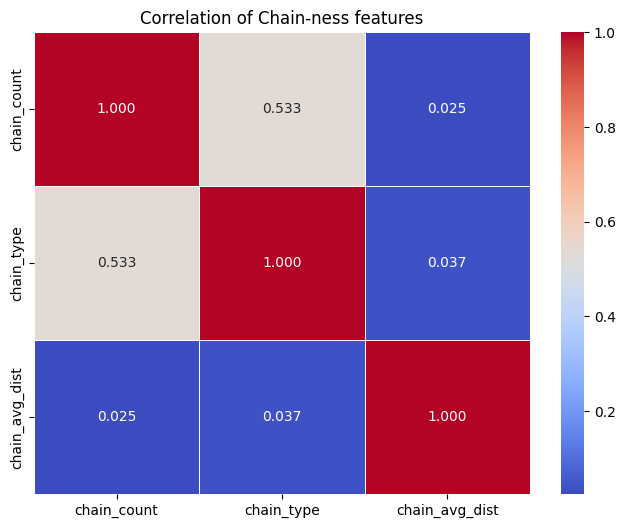

In [80]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
temp_df = yelp_df.copy()
temp_df['chain_avg_dist'] = scaler.fit_transform(temp_df[['chain_avg_dist']])
correlation_matrix = temp_df[['chain_count', 'chain_type',	'chain_avg_dist']].corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5)
plt.title('Correlation of Chain-ness features')
plt.show()

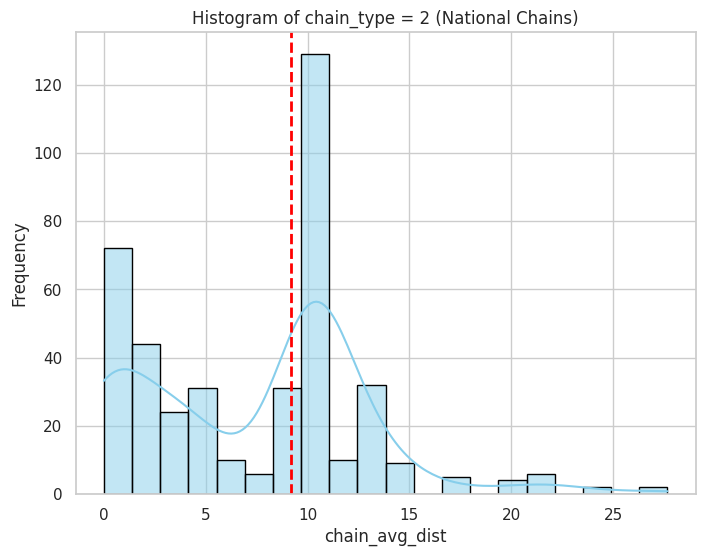

In [102]:
chain_type_2_data = yelp_df[yelp_df['chain_type'] == 2]
plt.figure(figsize=(8, 6))
sns.histplot(chain_type_2_data['chain_avg_dist'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.axvline(chain_type_2_data['chain_avg_dist'].median(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Histogram of chain_type = 2 (National Chains)')
plt.xlabel('chain_avg_dist')
plt.ylabel('Frequency')
plt.show()

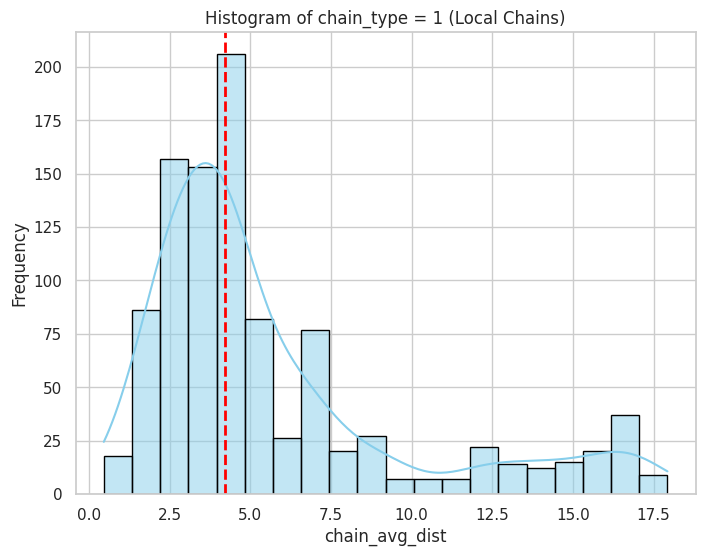

In [108]:
chain_type_1_data = yelp_df[(yelp_df['chain_type'] == 1) & ((yelp_df['chain_avg_dist'] <= 100)) ]
plt.figure(figsize=(8, 6))
sns.histplot(chain_type_1_data['chain_avg_dist'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.axvline(chain_type_1_data['chain_avg_dist'].median(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Histogram of chain_type = 1 (Local Chains)')
plt.xlabel('chain_avg_dist')
plt.ylabel('Frequency')
plt.show()

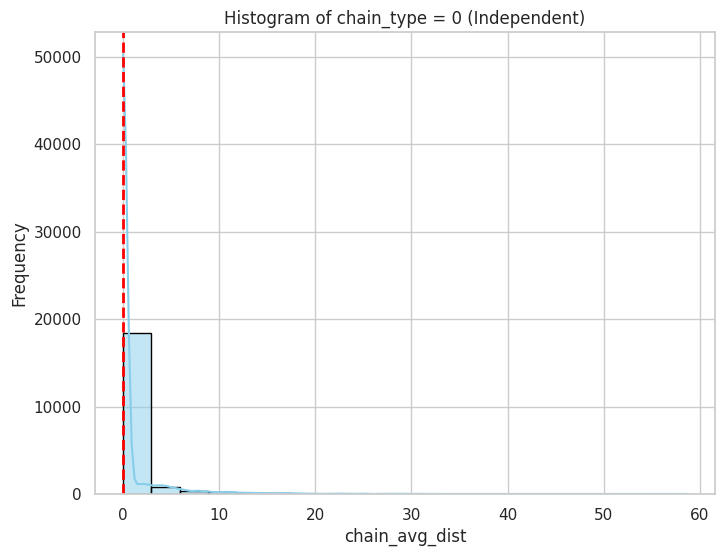

In [114]:
chain_type_0_data = yelp_df[(yelp_df['chain_type'] == 0) & (yelp_df['chain_avg_dist'] <= 100)]
plt.figure(figsize=(8, 6))
sns.histplot(chain_type_0_data['chain_avg_dist'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.axvline(chain_type_0_data['chain_avg_dist'].median(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Histogram of chain_type = 0 (Independent)')
plt.xlabel('chain_avg_dist')
plt.ylabel('Frequency')
plt.show()